
"""
Created on Mon Sep 19 16:57:47 2016 | modified & converted to notebook

@author: hrm

Exploring MTA Turnstile Data

%% Refs
http://web.mta.info/developers/turnstile.html
https://data.ny.gov/Transportation/NYC-Transit-Subway-Entrance-And-Exit-Data/i9wp-a4ja/data
https://spatialityblog.com/2010/07/08/mta-gis-data-update/


%% Pandas
http://pythonhow.com/accessing-dataframe-columns-rows-and-cells

"""


In [1]:
import matplotlib
%matplotlib inline

In [2]:
## Libraries
import matplotlib.pyplot as plt
import pandas as pd
import dateutil.parser as DUparser
from collections import defaultdict
import numpy as np

In [3]:
# # Make into Function -- load list of url data
urlList = ["http://web.mta.info/developers/data/nyct/turnstile/turnstile_160604.txt",
           "http://web.mta.info/developers/data/nyct/turnstile/turnstile_160528.txt",
           "http://web.mta.info/developers/data/nyct/turnstile/turnstile_160521.txt",
           "http://web.mta.info/developers/data/nyct/turnstile/turnstile_160514.txt",
           "http://web.mta.info/developers/data/nyct/turnstile/turnstile_160507.txt",
           "http://web.mta.info/developers/data/nyct/turnstile/turnstile_160430.txt",
           "http://web.mta.info/developers/data/nyct/turnstile/turnstile_160423.txt",
           "http://web.mta.info/developers/data/nyct/turnstile/turnstile_160409.txt",
           "http://web.mta.info/developers/data/nyct/turnstile/turnstile_160402.txt"]

filename = ["turnstile_160604",
           "turnstile_160528",
           "turnstile_160521",
           "turnstile_160514",
           "turnstile_160507",
           "turnstile_160430",
           "turnstile_160423",
           "turnstile_160409",
           "turnstile_160402"]

# len(urlList)#=9

# import pandas as pd
# #http://pandas.pydata.org/pandas-docs/stable/merging.html

# cnt=0
# for u in urlList:
#     Dtmp = pd.read_csv(u)
#     if cnt==0:
#         Dmat = Dtmp
#     else:
#         Dmat = pd.concat([Dmat, Dtmp])
#     cnt += 1

# del Dtmp

# D= Dmat

In [4]:
# url = "http://web.mta.info/developers/data/nyct/turnstile/turnstile_160604.txt"
# url = "http://web.mta.info/developers/data/nyct/turnstile/turnstile_160528.txt"
# url = "http://web.mta.info/developers/data/nyct/turnstile/turnstile_160521.txt"
# url = "http://web.mta.info/developers/data/nyct/turnstile/turnstile_160514.txt"
# url = "http://web.mta.info/developers/data/nyct/turnstile/turnstile_160507.txt" ##?
# url = "http://web.mta.info/developers/data/nyct/turnstile/turnstile_160430.txt"
# url = "http://web.mta.info/developers/data/nyct/turnstile/turnstile_160423.txt"
# url = "http://web.mta.info/developers/data/nyct/turnstile/turnstile_160409.txt"
# url = "http://web.mta.info/developers/data/nyct/turnstile/turnstile_160402.txt"
# D = pd.read_csv(url,na_values=['.', 0])

n=8
D = pd.read_csv(urlList[n],na_values=['.', 0])
pklfile1 = filename[n]+'_1'#+'.pkl'
pklfile0 = filename[n]+'_0'#+'.pkl'

#print(D)
#D.head

#D.columns
#Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME','DESC', 'ENTRIES','EXITS'], dtype='object')

In [5]:
pklfile0

'turnstile_160402_0'

In [6]:
# import dateutil.parser as DUparser
# from collections import defaultdict

def makeDataDict(D):
    Ddict = defaultdict(list)
    for row in D.values:
        ca = row[0]
        unit = row[1]
        scp = row[2]
        station = row[3]
        linename = row[4]
        division = row[5]
        date = row[6]
        #date_wday = DUparser.parse(date).weekday()
        time = row[7]
        desc = row[8]
        entries = row[9]
        exits = row[10]

    ##    Ddict[(ca, unit, scp, station)].append([DUparser.parse(date + " " + time), date_wday, int(entries) ]) #,  int(exits)])

    #     Ddict[(ca, unit, scp, station)].append([DUparser.parse(date + " " + time), int(entries) ]) #,  int(exits)])

        Ddict[(ca, unit, scp, station, linename)].append([DUparser.parse(date + " " + time), int(entries) ])

    return Ddict


In [7]:
Ddict = makeDataDict(D)

In [8]:
# list(Ddict.items())[:10]

In [9]:
#==============================================================================
# some time interval [0,4,8,12,16,20,(0)]+1 discrepancies over daylight savings but also sampling times.
# however, if we take day differences in the list of commuter vol/flow count data, this might not be an issue -- day+1[0] - day[0] || or Count_8/9pm - Count_4/8am? || TimeInt[5or-1] - TimeInt[1]

#https://pymotw.com/3/datetime/

#http://travel.mtanyct.info/serviceadvisory/

#==============================================================================

In [10]:
## Count Passenger Vol by Station-Unit_SCP
# import numpy as np

# def makeStaTSDict_countBYday(Ddict):
    
Sdict = defaultdict(list)

for key in Ddict:
    # new dict with station-related identifiers (e.g. Turnstiles) as key(s) and all entry/exit counts as list of values
    tmpHdict = defaultdict(list)

    for tf in Ddict[key]:
        DateTime= tf[0]
        #wday = tf[1]
        volume = tf[1]

        tmpHdict[DateTime.date()].append(volume)
#        break
#        print(tmpTdict)

    ## get difference between relevant highest(latest | 8/9pm) & lowest (earliest | 4/5am) index of count of the day
    tmpCdict = defaultdict(list)
    for date in tmpHdict.keys():
#        print (date)
        #count = max(tmpTdict[date]) - min(tmpTdict[date])
        if (len(tmpHdict[date])>=2):
            count = tmpHdict[date][len(tmpHdict[date])-1] - tmpHdict[date][1]            
        else:
            count = [0]

        # tmpCdict[date].append([date.weekday(),count])
        tmpCdict[date.weekday()].append(count)

#     ## exclude "outliers"
#     if np.all(np.array(list(tmpCdict.values()))>0)==True:  ## DOESN'T WORK FOR ALL DATASETS
        Sdict[key]= tmpCdict
#         if np.all(np.array(list(tmpCdict.values()))<6000000)==True:  
#             # reasonable counts per week || # 5000*(20-4) #*7 #560000
#             Sdict[key]= tmpCdict
#     elif np.all(np.array(list(tmpCdict.values()))>0)==False:
#         Sdict[key]= []

# 	return Sdict

In [11]:
# date.isocalendar()[1]
# Sdict
# key
# pd.DataFrame(list(Sdict.values())[12])
# date.isoweekday()
# np.all(np.array(list(tmpCdict.values()))>0)

In [12]:
# np.array(list(tmpCdict.values()))
# # np.all(np.array(list(tmpCdict.values()))>0)
# # tmpCdict.items()

# np.all(np.array(list(tmpCdict.values()))<6000000)==True

In [13]:
# Sdict = makeStaDict_TScountBYday(Ddict)

In [14]:
# Sdict

In [15]:
# 5000*16 #*7 #560000

In [16]:
# list(Sdict.values())[0]

In [17]:
# import numpy as np
# test=np.array(list(list(Sdict.values())[0].values()))
# test
# np.all(test>0)

In [18]:
## Cluster Daily Count Passenger Vol by Station/Station_Unit

# def makeStaDict_SUcountBYday(Sdict):
    
SNdict0 = defaultdict(list)  # with subway lines info
SNdict = defaultdict(list)   # without subway lines info

for key in Sdict:
    # new dict with stationName (+2other) identifier as key and all entry/exit counts as list of values
    #    print key
    #    print
    #SNdict0[key[0],key[1],key[3]].append( pd.DataFrame(Sdict[key]) )
    SNdict0[key[3],key[4]].append( pd.DataFrame(Sdict[key]) )
    SNdict[key[3]].append( pd.DataFrame(Sdict[key]) )

# 	return SNdict0, SNdict

In [19]:
# SNdict0, SNdict = makeStaDict_SUcountBYday(Sdict)

In [20]:
# key
# Sdict[key].values()
# # pd.DataFrame(Sdict[key])
# # key[3]
# SNdict

In [21]:
# pd.concat(SNdict[list(SNdict.keys())[0]])

In [22]:
# # np.sum(list(pd.concat(SNdict[list(SNdict.keys())[0]]).sum())) #39566
# np.sum?
# pd.sum?

In [23]:
## Weekly Total Passenger Vol by Station/Station_Unit

def makeStaDict_countBYweek(SNdict):   
    StatFlowDict = defaultdict(list)
    for key in SNdict:
        StatFlowDict[key] =  np.sum(list(pd.concat(SNdict[key]).sum()))
    return StatFlowDict    
    
# StatFlowDict = defaultdict(list)
# for key in SNdict:
#     StatFlowDict[key] =  np.sum(list(pd.concat(SNdict[key]).sum())) 

# StatFlowDict0 = defaultdict(list)    
# for key in SNdict0:    
#     StatFlowDict0[key] =  np.sum(list(pd.concat(SNdict0[key]).sum())) 


In [24]:
StatFlowDict = makeStaDict_countBYweek(SNdict)   
StatFlowDict0 = makeStaDict_countBYweek(SNdict0) 

In [25]:
# StatFlowDict

In [26]:
# StatFlowDF.plot()

In [27]:
# StatFlowDF = pd.DataFrame(list(StatFlowDict.items()))

In [28]:
# StatFlowDF[2] = StatFlowDF[1] 
# StatFlowDF

In [29]:
# StatFlowDF.sort_values(by=1)
# StatFlowDF.sort_values(by=0)

In [30]:
# StatFlowDF.describe()

In [31]:
StatFlowDF = pd.DataFrame(list(StatFlowDict.items()))
StatFlowDF0 = pd.DataFrame(list(StatFlowDict0.items()))

StatFlowDF.to_csv(pklfile1 +'.csv')
StatFlowDF0.to_csv(pklfile0 + '.csv')

# StatFlowDF0

In [32]:
pklfile1 +'.csv'

'turnstile_160402_1.csv'

In [33]:
StatFlowDS = pd.Series(StatFlowDict, name = 'DateValue')
# StatFlowDF2.to_csv('StatFlowDF2.csv')

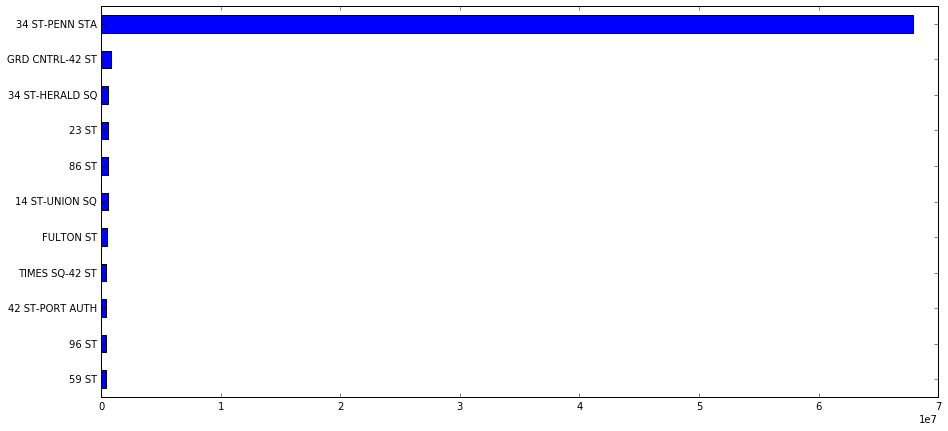

In [34]:
plt.figure(figsize=(15,7))
# plt.figure()
# StatFlowDF2.nlargest(15).plot(kind='bar')
df = StatFlowDS.sort_values(ascending=False)
ax = df.iloc[:11].plot(kind="barh")
ax.invert_yaxis()

In [35]:
# df

In [36]:
StatFlowDS0 = pd.Series(StatFlowDict0) #, name = 'DateValue')

# StatFlowDF02.to_csv('StatFlowDF02_lines.csv')

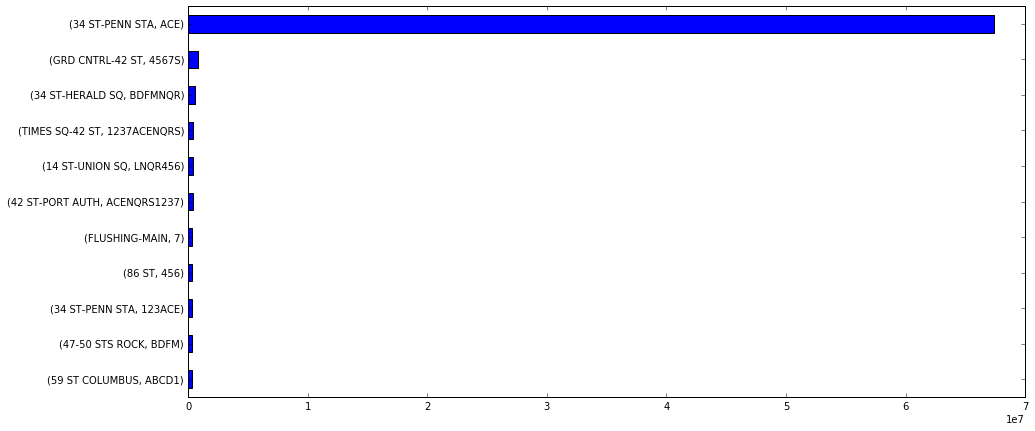

In [37]:
plt.figure(figsize=(15,7))
# StatFlowDF02.nlargest(15).plot(kind='bar')
df = StatFlowDS0.sort_values(ascending=False)
ax = df.iloc[:11].plot(kind="barh")
ax.invert_yaxis()


In [38]:
StatFlowDF.shape

(373, 2)

In [39]:
StatFlowDF0.shape

(472, 2)

In [41]:
# import pickle

# with open(pklfile1,'wb') as picklefile:
#     pickle.dump(StatFlowDF, picklefile)
# #     pickle.dump(StatFlowDict, picklefile)    

# with open(pklfile0,'wb') as picklefile:
#     pickle.dump(StatFlowDF0, picklefile)
# #     pickle.dump(StatFlowDict0, picklefile)
        
# # StatFlowDF02.to_pickle('StatFlowDF02_test.pkl')

In [42]:
# with open(pklfile1, 'rb') as picklefile:
#     data1 = pd.DataFrame(pickle.load(picklefile))
# #     data1 = pickle.load(picklefile)

# # with open('StatFlowDF0_test.pkl', 'rb') as picklefile:
# #     data = pd.DataFrame(pickle.load(picklefile))

# with open(pklfile0, 'rb') as picklefile:
#     data0 = pd.DataFrame(pickle.load(picklefile))
# #     data0 = pickle.load(picklefile)

In [43]:
# data1.sort(columns=1, ascending=False)
# pd.concat([data1, data0[1]], axis=1, join_axes=[data1.index])

In [44]:
# ## Tried to read in... to average but the names might not match... =(
# # MAYBE RANKING TOP 10 stations over the week to see the frequency insteaD? 
# # data1.sort(columns=1, ascending=False)


# from collections import defaultdict
# import pandas as pd
# import pickle


# filename = ["turnstile_160604",
#            "turnstile_160528",
#            "turnstile_160521",
#            "turnstile_160514",
#            "turnstile_160507",
#            "turnstile_160430",
#            "turnstile_160423",
#            "turnstile_160409",
#            "turnstile_160402"]


# StatCdict = defaultdict(list)
# for f in filename:
#     print(f)
#     pklfile1 = f+'_1'+'.pkl'
#     #pklfile0 = filename[n]+'_0'+'.pkl'
#     print(pklfile1)

#     with open(pklfile1, 'rb') as picklefile:
#         data1 = pd.DataFrame(pickle.load(picklefile))
#         data2 = data1.sort(columns=1, ascending=False)
        
        
# #        data1 = pickle.load(picklefile)

# #    data1_Dict = dict(zip(data1[0], data1[1]))
# #
# #    Ddict = defaultdict(list)
# #    for k, v in data1_Dict.items():
# #        Ddict[k].append(v)


# for f in filename:
#     print(f)
#     pklfile0 = f+'_0'+'.pkl'
#     #pklfile0 = filename[n]+'_0'+'.pkl'
#     print(pklfile0)

#     with open(pklfile0, 'rb') as picklefile:
#         data0 = pd.DataFrame(pickle.load(picklefile))
# #        data0 = pickle.load(picklefile)

# #    data0_Dict = dict(zip(data1[0], data1[1]))
# #
# #    Ddict = defaultdict(list)
# #    for k, v in data1_Dict.items():
# #        Ddict[k].append(v)